In [1]:
pip install -q tensorflow pandas numpy matplotlib scikit-learn


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('fer2013.csv')

# Extract features and labels
pixels = df['pixels'].tolist()
faces = np.array([np.fromstring(pixel, sep=' ') for pixel in pixels], dtype='float32')
faces = faces.reshape(-1, 48, 48, 1) / 255.0  # normalize

labels = pd.get_dummies(df['emotion']).values

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(faces, labels, test_size=0.2, random_state=42)


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # 7 emotions
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 46, 46, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 21, 21, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,048,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,422,087 (5.42 MB)

 Trainable params: 1,421,191 (5.42 MB)

 Non-trainable params: 896 (3.50 KB)

In [4]:
history = model.fit(
    X_train, y_train,
    batch_size=64,
    epochs=25,
    validation_split=0.2,
    verbose=1
)


Epoch 1/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 349s 961ms/step - accuracy: 0.2518 - loss: 2.2637 - val_accuracy: 0.2584 - val_loss: 1.7847
Epoch 2/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 337s 940ms/step - accuracy: 0.3569 - loss: 1.6143 - val_accuracy: 0.3992 - val_loss: 1.5663
Epoch 3/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 382s 941ms/step - accuracy: 0.4011 - loss: 1.5179 - val_accuracy: 0.4406 - val_loss: 1.4773
Epoch 4/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 384s 946ms/step - accuracy: 0.4275 - loss: 1.4673 - val_accuracy: 0.4758 - val_loss: 1.3585
Epoch 5/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 332s 924ms/step - accuracy: 0.4484 - loss: 1.4072 - val_accuracy: 0.4807 - val_loss: 1.3532
Epoch 6/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 388s 940ms/step - accuracy: 0.4663 - loss: 1.3799 - val_accuracy: 0.4897 - val_loss: 1.3433
Epoch 7/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 375s 920ms/step - accuracy: 0.4830 - loss: 1.3238 - val_accuracy: 0.4784 - val_loss: 1.3767
Epoch 8/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 381s 916ms/step - accuracy: 0.5100 -

In [5]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")


225/225 ━━━━━━━━━━━━━━━━━━━━ 25s 112ms/step - accuracy: 0.5701 - loss: 1.2280
Test Accuracy: 56.17%


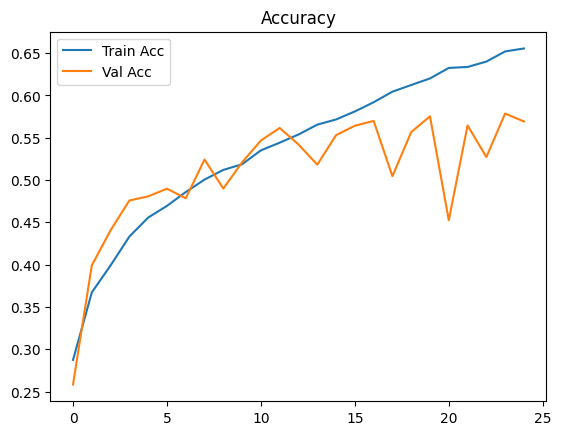

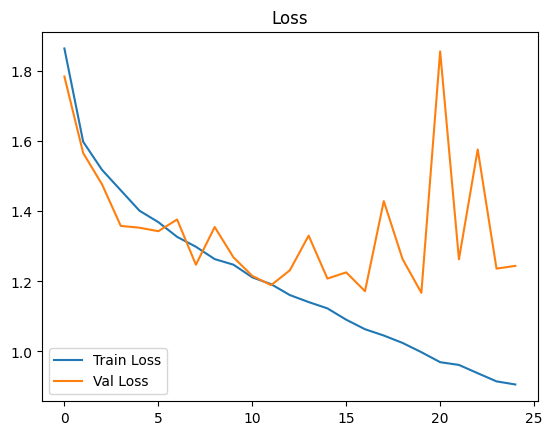

In [6]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')
plt.show()


In [7]:
model.save('emotion_detection_model.h5')


In [8]:
model.save("emotion_model.h5")


In [12]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array

# Load and preprocess the image
img_path = '/content/sad.jpg.webp'  # replace with your uploaded image name
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # convert to grayscale
img = cv2.resize(img, (48, 48))              # resize to 48x48
img = img / 255.0                            # normalize
img = img.reshape(1, 48, 48, 1)              # reshape for model

# Predict
pred = model.predict(img)
emotion_classes = ['Angry', 'Happy', 'Sad']
predicted_emotion = emotion_classes[np.argmax(pred)]

print(f" Predicted Emotion: {predicted_emotion}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
 Predicted Emotion: Sad


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


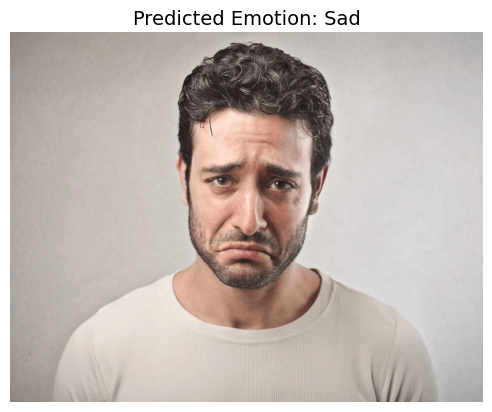

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array

# Load and preprocess the image
img_path = '/content/sad.jpg.webp'  # Replace with your image name
img = cv2.imread(img_path)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # convert to grayscale
img_resized = cv2.resize(img_gray, (48, 48))      # resize to 48x48
img_normalized = img_resized / 255.0              # normalize
img_input = img_normalized.reshape(1, 48, 48, 1)   # reshape for model input

# Predict
pred = model.predict(img_input)
emotion_classes = ['Angry', 'Fear', 'Happy', 'Sad', 'Neutral']
predicted_emotion = emotion_classes[np.argmax(pred)]

# Display image with predicted emotion
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # show original image in color
plt.title(f"Predicted Emotion: {predicted_emotion}", fontsize=14)
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


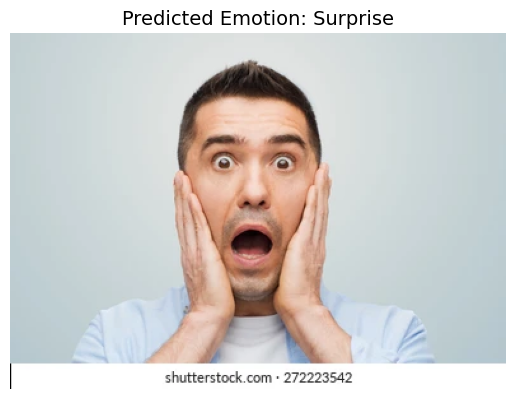

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array

# Load and preprocess the image
img_path = '/content/fear-emotions-horror-people-concept-260nw-272223542.jpg.webp'  # Replace with your image name
img = cv2.imread(img_path)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # convert to grayscale
img_resized = cv2.resize(img_gray, (48, 48))      # resize to 48x48
img_normalized = img_resized / 255.0              # normalize
img_input = img_normalized.reshape(1, 48, 48, 1)   # reshape for model input

# Predict
pred = model.predict(img_input)
emotion_classes = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
predicted_emotion = emotion_classes[np.argmax(pred)]

# Display image with predicted emotion
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # show original image in color
plt.title(f"Predicted Emotion: {predicted_emotion}", fontsize=14)
plt.axis('off')
plt.show()
